Import required libaries

In [1151]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Then we insert all the required connection properties

In [1152]:
conn = pyodbc.connect('Driver={SQL Server};' # This is what server type we are connecting to
                      'Server=DESKTOP-7TT1T41\SERVER1;' # This is the location and name of the server, same as what we use to connect using SSMS
                      'Database=AdventureWorks2019;' # This is which database we are connecting to within the selected server
                      'Trusted_Connection=yes;') # This allows us to forgo entering a trusted key or password because we are the admin of this computer and the...
                    # ... database has been configured to allow this user when we set it up. 

Now we create the cursor

In [1153]:
cursor = conn.cursor()

Here we define what query we want executed in the database

In [1154]:
# Selected my SQL query to now start visualising my code

In [1155]:
query = 'SELECT E.VacationHours, SP.Bonus FROM [HumanResources].[Employee] AS E INNER JOIN [Sales].[SalesPerson] AS SP ON SP.BusinessEntityID = E.BusinessEntityID ORDER BY SP.Bonus DESC'


Here we assign the resulting table returned from the database as a variable 'salesdata'. 
This is also where our connection actually runs using the defined properties and query above

In [1156]:
salesdata = pd.read_sql(query, conn)

C:\Users\Adeyi\AppData\Local\Temp\ipykernel_47980\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


Let's get a preview of what our data looks like:

In [1157]:
print(salesdata.head())

   VacationHours   Bonus
0             29  6700.0
1             36  5650.0
2             37  5150.0
3             22  5000.0
4             31  5000.0


Lastly i create a scatter plot using two of the fields returned from the database

In [1158]:
# After trail and error I found that using a scatter plot was the best way to present the data
# It provided me with a better suited represntation of the data
# I made use of a trendline to bring focus to increased bonus with more annual leave taken

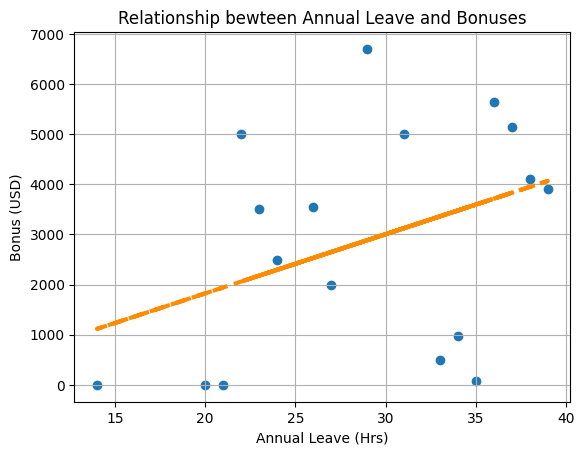

In [1159]:
plt.scatter(salesdata.VacationHours, salesdata.Bonus)
# Calculate the equation for the linear trendline
z = np.polyfit(salesdata.VacationHours, salesdata.Bonus, 1)
p = np.poly1d(z)
# Add the trendline to the plot
plt.plot(salesdata.VacationHours, p(salesdata.VacationHours), color="darkorange", linewidth=3, linestyle="--")
plt.xlabel('Annual Leave (Hrs)')
plt.ylabel('Bonus (USD)')
plt.title('Relationship bewteen Annual Leave and Bonuses')
plt.grid(True)
plt.show()

In [1160]:
# Here I calculated the correlation coefficient between annual leave taken and Bonuses
correlation_coefficient_VacationHours = np.corrcoef(salesdata['Bonus'], salesdata['VacationHours'])[0, 1]
print("correlation coefficicient between VacationHours and Bonus:", correlation_coefficient_VacationHours)

correlation coefficicient between VacationHours and Bonus: 0.38210746165598647


In [1161]:
# Selected query from SQL to start generating the most accurate and easily readable visual

In [1162]:
query = 'SELECT CountryRegionCode, SUM(SalesYTD) AS TotalSalesYTD FROM [Sales].[SalesTerritory] GROUP BY CountryRegionCode ORDER BY TotalSalesYTD DESC;'

In [1163]:
salesdata = pd.read_sql(query, conn)

C:\Users\Adeyi\AppData\Local\Temp\ipykernel_47980\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


In [1164]:
print(salesdata.head())

  CountryRegionCode  TotalSalesYTD
0                US   2.641106e+07
1                CA   6.771829e+06
2                AU   5.977815e+06
3                GB   5.012905e+06
4                FR   4.772398e+06


In [1165]:
# Bare chart showing the highest and lowest revenue
#Through trial and error I found that the best chart to use was a bar chart. It generated a clear visual of the data
# I made use of colours to further emphasie the highest and lowest revenue in the selected countries

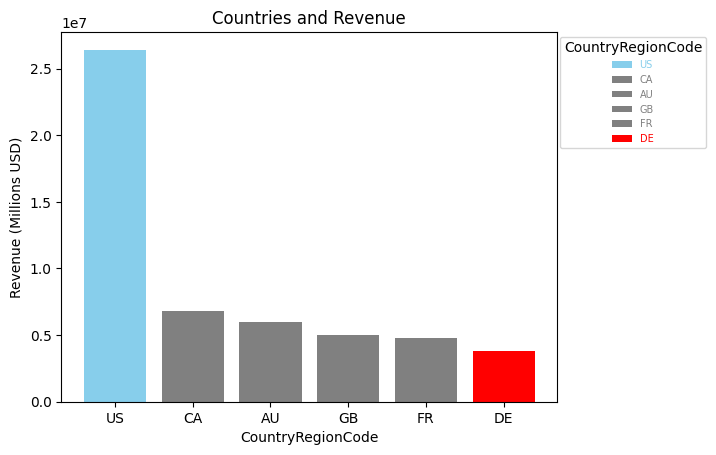

In [1166]:
colors = {'US': 'SkyBlue', 'CA': 'grey', 'AU': 'grey', 'GB': 'grey', 'FR': 'grey', 'DE': 'red'}
bars = plt.bar(salesdata['CountryRegionCode'], salesdata['TotalSalesYTD'], color=[colors[code] for code in salesdata['CountryRegionCode']])
plt.xlabel('CountryRegionCode')
plt.ylabel('Revenue (Millions USD)')
plt.title('Countries and Revenue')
legend_labels = salesdata['CountryRegionCode']
legend_colors = [colors[code] for code in salesdata['CountryRegionCode']]
plt.legend(bars, legend_labels, title='CountryRegionCode', loc='upper right', bbox_to_anchor=(1.31, 1), prop={'size': 7}, markerscale=0.3, labelcolor=legend_colors)
plt.show()

In [1167]:
# Pie chart to show where the the highest percentage of sales come from which may be more useful for the company to navigate with their figuers and bueget distribution

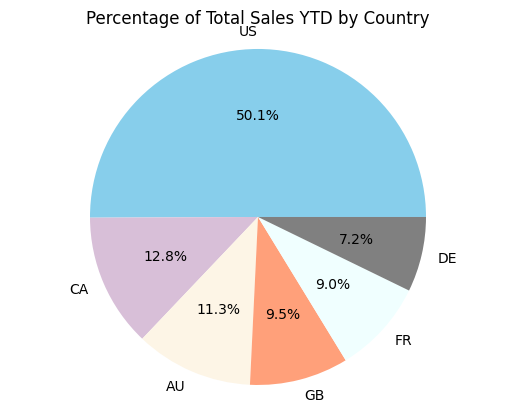

In [1168]:
colors = ['skyblue', 'thistle', 'oldlace', 'lightsalmon', 'azure', 'grey']
plt.pie(salesdata['TotalSalesYTD'], labels=salesdata['CountryRegionCode'], autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.title('Percentage of Total Sales YTD by Country')
plt.show()

In [1169]:
# Selected modified query from SQL that include TotalSalesLastYear to provide comparision between current and past.
# Here we can clearly see an increase in revenue in all countries

In [1170]:
query = 'SELECT CountryRegionCode, SUM(SalesYTD) AS TotalSalesYTD, SUM(SalesLastYear) AS TotalSalesLastYear FROM [Sales].[SalesTerritory] GROUP BY CountryRegionCode ORDER BY TotalSalesYTD DESC;'

In [1171]:
salesdata = pd.read_sql(query, conn)

C:\Users\Adeyi\AppData\Local\Temp\ipykernel_47980\1111421933.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salesdata = pd.read_sql(query, conn)


In [1172]:
# Printed query data

In [1173]:
print(salesdata.head())

  CountryRegionCode  TotalSalesYTD  TotalSalesLastYear
0                US   2.641106e+07        1.940250e+07
1                CA   6.771829e+06        5.693989e+06
2                AU   5.977815e+06        2.278549e+06
3                GB   5.012905e+06        1.635823e+06
4                FR   4.772398e+06        2.396540e+06


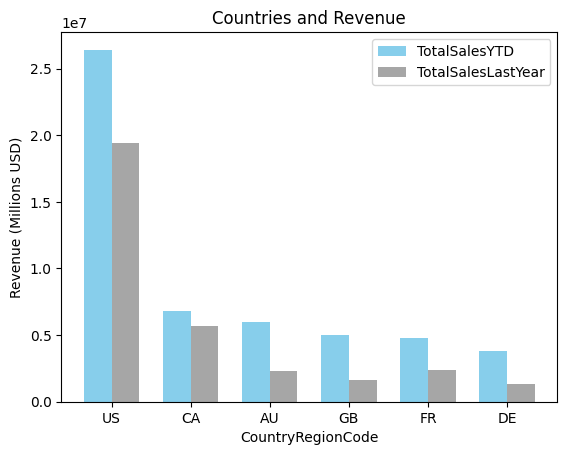

In [1174]:
bar_width = 0.35
bar_positions_ytd = range(len(salesdata))
bar_positions_last_year = [pos + bar_width for pos in bar_positions_ytd]
plt.bar(bar_positions_ytd, salesdata['TotalSalesYTD'], width=bar_width, color='skyblue', label='TotalSalesYTD')
plt.bar(bar_positions_last_year, salesdata['TotalSalesLastYear'], width=bar_width, color='grey', label='TotalSalesLastYear', alpha=0.7)
plt.xlabel('CountryRegionCode')
plt.ylabel('Revenue (Millions USD)')
plt.title('Countries and Revenue')
plt.xticks([pos + bar_width / 2 for pos in bar_positions_ytd], salesdata['CountryRegionCode'])
plt.legend()
plt.show()

In [ ]:
# Pie chart showing Percentage of total sale last year 

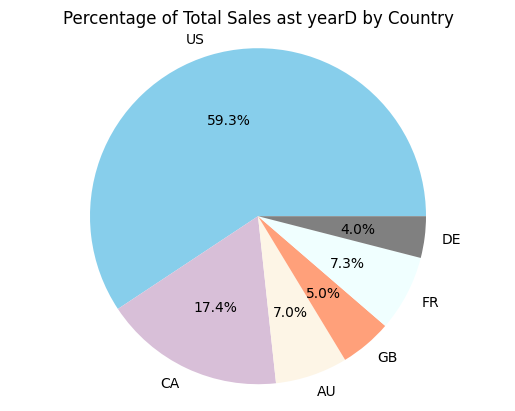

In [1175]:
colors = ['skyblue', 'thistle', 'oldlace', 'lightsalmon', 'azure', 'grey']
plt.pie(salesdata['TotalSalesLastYear'], labels=salesdata['CountryRegionCode'], autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.title('Percentage of Total Sales ast year by Country')
plt.show()

Now you can reverse engineer the code I have shown you above to create your own projects